<a href="https://colab.research.google.com/github/enmwmak/Diarization/blob/master/Voice_clone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EIE558 Voice Cloning Lab**

This lab exercise is based on the Real-Time Voice Cloning project in https://github.com/CorentinJ/Real-Time-Voice-Cloning, which implements the algorithms in the paper ["Transfer Learning from Speaker Verification to Multispeaker Text-To-Speech Synthesis"](https://arxiv.org/pdf/1806.04558.pdf). The DNN-based speech synthesizer can generate speech in the voice of different speakers, including those unseen during training. 

The voice cloning system consists of three components: (1) a speaker encoder network that was trained on a speaker verification task to generate a fixed-dimensional embedding vector based on several seconds of speech from a target speaker; (2) a sequence-to-sequence synthesis network that generates a mel spectrogram from text, conditioned on the speaker embedding; and (3) an auto-regressive WaveNet-based vocoder network that converts the mel spectrogram into time domain waveform samples. The system architecture is shown in Fig. 1. You may watch the video https://www.youtube.com/watch?v=-O_hYhToKoA for some demonstration of this voice cloning system.

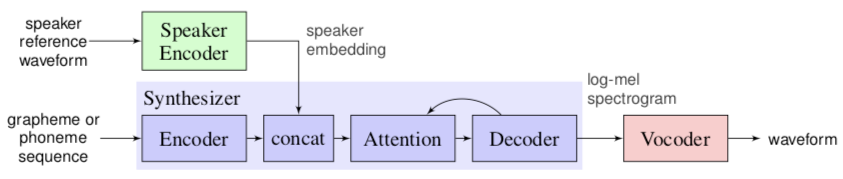
<center>Fig.1: Architecture of the voice cloning system</center>


<font color="green">*Step 1: Mount Google drive and change to lab session folder*<font>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/My Drive/Learning/EIE558/lab3"

Mounted at /content/drive/
/content/drive/My Drive/Learning/EIE558/lab3


<font color="green">*Step 2: Download software from the course's website*<font>

In [ ]:
# If the 'voice-clone' directory exists and is empty, you may delete the directory and run this step again.
%%shell
cd "/content/drive/My Drive/Learning/EIE558/lab3"
dir="voice-clone" 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.tgz"
  wget http://bioinfo.eie.polyu.edu.hk/download/EIE558/voice-clone/${dir}.tgz;
  tar zxf ${dir}.tgz;
  rm -f ${dir}.tgz*;
else
  echo "Directory $dir already exist"
fi

Directory voice-clone already exist


In [3]:
# Change to the newly created voice-clone/ folder
%cd "/content/drive/My Drive/Learning/EIE558/lab3/voice-clone"

/content/drive/My Drive/Learning/EIE558/lab3/voice-clone


<font color="green">*Step 3: Install Python packages. Make sure that GPU will be used by clicking "Edit" --> "Notebook Setting"*<font>

In [ ]:
# Make sure we are in the voice-clone/ folder
%%shell
curdir=$(pwd -P)
curdir=${curdir##*/}
echo $curdir
if [ "$curdir" == "voice-clone" ]; then
  echo "Installing Python packages"
  pip install tensorflow-gpu==1.15
  pip install gast==0.2.2
  pip install folium==0.2.1
  pip install imgaug==0.2.5
  pip install sounddevice
  pip install SoundFile
  pip install PyQt5
  pip install webrtcvad
  pip install -q -r requirements.txt
else
  echo "Change current directory to voice-clone/ first"
fi    

In [5]:
# Make sure that Tensorflow version is 1.15
import tensorflow as tf
print(tf.__version__)

1.15.0


<font color="green">*Step 4: Install Linux packages and Python matplotlib*<font>

In [ ]:
!sudo apt-get install libportaudio2
!sudo pip uninstall -y matplotlib
!sudo pip install matplotlib==3.1.3
!sudo apt-get install sox

<font color="green">*Step 5: Cloning voice*<font>

In [ ]:
!mkdir -p clone
!python3 cloning.py --in_file samples/trump.wav --out_file clone/trump.wav --text \
"Playback the target-speaker's speech and the synthetic speech to see if they sound alike"

<font color="green">*Step 6: Playback the target-speaker's speech and the synthetic speech to see if they sound alike*<font>

In [8]:
from IPython.display import Audio
import soundfile as sf
tgt_speech, srate = sf.read('samples/trump.wav')
print('Voice of the target speaker')
Audio(tgt_speech, rate=srate)

Voice of the target speaker


In [9]:
from scipy.io import wavfile
srate, syn_speech = wavfile.read('clone/trump.wav')
print('Synthetic speech of the target speaker')
Audio(syn_speech, rate=srate)

Synthetic speech of the target speaker


In [ ]:
plot_speech(syn_speech)

<font color="green">*Step 7: Repeat Steps 5 using another target speaker*<font>

In [ ]:
!python3 cloning.py --in_file samples/4018-107338-0021.flac --out_file clone/4018-107338-0021.wav --text \
"Playback the target-speaker's speech and the synthetic speech to see if they sound alike"

<font color="green">*Step 8: Playback the target-speaker's speech and the synthetic speech to see if they sound alike*<font>

In [11]:
from IPython.display import Audio
import soundfile as sf
tgt_speech, srate = sf.read('samples/4018-107338-0021.flac')
print('Voice of the target speaker')
Audio(tgt_speech, rate=srate)

Voice of the target speaker


In [12]:
from scipy.io import wavfile
srate, syn_speech = wavfile.read('clone/4018-107338-0021.wav')
print('Synthetic speech of the target speaker')
Audio(syn_speech, rate=srate)

Synthetic speech of the target speaker


In [ ]:
plot_speech(syn_speech)

<font color="green">*Step 9: Reduce the length of the target speaker's speech to see the effect of speaker embedding on the synthetic speech*<font>

In [13]:
!sox samples/trump.wav samples/trump-10s.wav trim 0 10

In [ ]:
!python3 cloning.py --in_file samples/trump-10s.wav --out_file clone/trump-10s.wav --text \
"Playback the target-speaker's speech and the synthetic speech to see if they sound alike"

<font color="green">*Step 10: Compute the cosine distance between*</font>

1.   "samples/trump.wav" and "clone/trump.wav" (synthetic speech based on full-length speech file of the target speaker)
1.   "samples/trump.wav" and "clone/trump-10s.wav"
2.   "samples/trump.wav" and "samples/trump-10s.wav"
3.   "clone/trump.wav" and "clone/trump-10s.wav"
2.   "samples/4018-107338-0021.flac and clone/4018-107338-0021.wav"
2.   "samples/trump.wav and samples/4018-107338-0021.flac"
5.   "samples/trump-10.wav and samples/4018-107338-0021.flac"

<font color="green">*Discuss and explain your observations. Which pair shows the highest similarity and with pair shows the lowest? You may use the program "embed_dist.py" to compute the cosine-distance between two speaker embeddings as follows:*</font>


In [ ]:
!python3 embed_dist.py --file1 samples/trump.wav --file2 samples/2902-9006-0003.flac

In [ ]:
!python3 embed_dist.py --file1 samples/trump.wav --file2 clone/trump.wav

<font color="green">*Step 11: Investigate the speech quality when the embedding vector is random. This can be done by removing the comments of the following two lines in cloning.py*</font>

<font color="blue">
 #embed = np.random.rand(speaker_embedding_size)

 #embed /= np.linalg.norm(embed) 
</font>

Submit your wavefiles in the clone/ folder to Blackboard